In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [9]:
pd.set_option('display.max_colwidth', -1)

In [16]:
cd Pickled_from_mongo/

/home/jovyan/capstone-52/Pickled_from_mongo


In [17]:
df = pd.read_pickle('../Pickled_from_mongo/combined_eg_gulf.p')

In [18]:
df.shape

(940, 5)

In [19]:
df = df.drop(['_id', ], axis=1)


In [20]:
df = df.set_index(['cleaned_name'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 940 entries, kamal to AAlawone
Data columns (total 3 columns):
cleaned_geo     940 non-null object
cleaned_text    940 non-null object
class           940 non-null object
dtypes: object(3)
memory usage: 29.4+ KB


In [22]:
df.sample(8)

,cleaned_geo,cleaned_text,class
cleaned_name,,,
AhmedMea2,Egypt,طيب ريحي شويه.....اشربي كوباية نسكافيه واسمعي حاجه لفيروز,EG
Ahmad606606,Alex,: مساء الخيرات ي احمد ازيك,EG
abooabed1571,None,: السلام عليكم عندنا عمالين موجود عامل نظافة عامل معماري عامل تربية مواشي عامل مغسلة عامل الجبس عامل استراحة واتساب /…,GULF
JHumaidi,الخبر,لاأزال لا أستوعب سبب عدم منح تراخيص لجمعيات تعاونية تنتشر في الاحياء و يصمًم لها نموذج موحًد كما…,GULF
eng_wanni,None,خير اختي مضيعه الطريج !,GULF
del3bdelwahab,None,ازيك يا مي يوووه نسيت انك ماخدتيش الجايزه,EG
theoneulikee,آخر الشارع يمين,"انا بشرب اقذر كوباية قهوة في العالم عشان اعرف اكمل اليوم :""(",EG
Sweetmayouya,None,: كويسين ودي مايوياا بنتي سلمي علي طنط,EG


In [23]:
df[df.index=='adoom101']

,cleaned_geo,cleaned_text,class
cleaned_name,,,
adoom101,الاسكندرية,لما البنت اللي بتحبها تكون واقفه مع ابوها وانت بقالك كتير مشوفتهاش والنبي ياحج متعرفش شارع ياواحشني رد عليا ازيك سل…,EG


## Benchmark LSA with no stop words

### Label Encode the Categories


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
df['class_numerical'] = le.fit_transform(df['class'])

In [26]:
df.shape

(940, 4)

In [27]:
df.sample(8)

,cleaned_geo,cleaned_text,class,class_numerical
cleaned_name,,,,
abowaled_91,None,انتهت الجلسه وين البشرى والفرحه للأسف يبون الأمور على كيفهم تعديل القوانين خطوه جيده وتحسب للمجلس طيب عودة اللجا…,GULF,1
Melesia_achraaf,Egypt,: = ازيك ياسطا عامل ايه - لا انجز خش ع المصلحه علي طول ماعندناش وقت نضيعه,EG,0
weaamaboelwafa1,Egypt,شوفت لما تجاهلت الناس وشك نور أزاي,EG,0
SaFi_Muhammed3,None,انا بتضايق لما كوباية النيسكافيه بتخلص,EG,0
DIOR911,Kuwait,هذا ينطبق عليه المثل : مشاري من أمامي والعاصفة من خلفي 🤣🤣 بس عجبني صملها يمثلني عند الاكشن,GULF,1
Abdli555,None,مرافق محطة النرجس:للايجار مغسلة بنشر زيت بقالة بنزين ورشة قيمة الاجار الف في السنه,GULF,1
awada2861,Saudi Arabia,مغاسل الجبر بالشرقية غسيل مجالس كنب موكيت فرش ستائر خيم بيوت الشعر جميع الفرش مغسلة الجبر بالدمام بالخبر…,GULF,1
fah_ad8,None,: شباب فتحت مغسلة سيارات لغسل السيارة من الداخل والخارج واول غسلة مجانية والدعوة للجميع لتجربة ... تكفون احتاج دعمك…,GULF,1


In [28]:
df.class_numerical.unique()


array([0, 1])

In [29]:
df.head()

,cleaned_geo,cleaned_text,class,class_numerical
cleaned_name,,,,
kamal,None,أزاي أقول لك كنا زمان ... والماضي كان فى الغيب بكره واللي أحنا فيه دلوقت كمان ... ح يفوت علينا ولا ندري,EG,0
agabdelrehim,Egypt,هي آراء آه بس أزاي أجويرو منتهي يعني أمال لو مكنش الهداف التاريخي للسيتي و كل موسم اقل عدد من الاهداف…,EG,0
ElsndubadE,None,أنت صيني أزاي تقارن شادي بالخطيب ألي هو الوحيد ألي خد الكورة الذهبية من مصر وبشهادت الزملكاوي قبل الأ…,EG,0
h_sawires,None,أزاي الناس كانت بتغرد في الخمسينات قبل إختراع تويتر.,EG,0
Hagerelmor,Egypt,التوينز اللي معاها كل الحلو والوحش والمصايب والاكل والفشل مش عارفه من غيرك كنت هعيش أزاي ربنا يخليكي ليا ومش تويته توصفك,EG,0


### Prepare Document Term Matrix


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [31]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1)


### TFIDF

In [32]:
document_term_matrix_sps = tfidf_vectorizer.fit_transform(df.cleaned_text)

In [33]:
document_term_matrix_sps


<940x4297 sparse matrix of type '<class 'numpy.float64'>'
	with 9954 stored elements in Compressed Sparse Row format>

In [34]:
tfidf_vectorizer.get_feature_names()

['___',
 '_ثواني',
 '_ضمان١٠سنوات',
 'about',
 'al',
 'and',
 'aziz',
 'cousin',
 'day',
 'depressed',
 'dreamsste',
 'full',
 'hahahahahaha',
 'humor',
 'jeddah',
 'joke',
 'live',
 'nada',
 'network',
 'of',
 'on',
 'patient',
 'plan',
 'pvc',
 'qinصناعة',
 'rice',
 'riyadh',
 'road',
 'sensé',
 'sh',
 'smiling',
 'so',
 'soundtrack',
 'unnamed',
 'via',
 'what',
 'whatsapp',
 'you',
 'آخر',
 'آراء',
 'آمالي',
 'آمين',
 'آنا',
 'آه',
 'آيه',
 'أأجدع',
 'أبدا',
 'أبدي',
 'أبسلوتلي',
 'أبطال',
 'أبكى',
 'أبنائهم',
 'أبي',
 'أبيه',
 'أترك',
 'أتركني',
 'أتكلم',
 'أتكلمت',
 'أجد',
 'أجمعين',
 'أجويرو',
 'أحد',
 'أحسن',
 'أحلي',
 'أحنا',
 'أحواضنا',
 'أخبار',
 'أخبارك',
 'أخدت',
 'أخرقصيده',
 'أخو',
 'أخون',
 'أدخن',
 'أدعي',
 'أدق',
 'أدليك',
 'أرب',
 'أرباح',
 'أرضية',
 'أريد',
 'أزاي',
 'أزي',
 'أسالك',
 'أستوعب',
 'أسمر',
 'أسمع',
 'أشخاص',
 'أشده',
 'أشعلت',
 'أصحاب',
 'أصلا',
 'أصلي',
 'أصور',
 'أطوف',
 'أعادة',
 'أعتقد',
 'أعرض',
 'أعرف',
 'أعظم',
 'أعقاب',
 'أعلم',
 'أعمالنا',
 'أ

In [35]:
document_term_matrix_df = pd.DataFrame(document_term_matrix_sps.toarray(),
                                       index=df.index,
                                       columns=tfidf_vectorizer.get_feature_names())

In [36]:
document_term_matrix_df.head()

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
cleaned_name,,,,,,,,,,,,,,,,,,,,,
kamal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agabdelrehim,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ElsndubadE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h_sawires,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hagerelmor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
pd.concat([df.cleaned_text, document_term_matrix_df], axis=1).sample(10)

,cleaned_text,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
cleaned_name,,,,,,,,,,,,,,,,,,,,,
Mahmoud1560,انا الفترة دي مخنوق لدرجة لو حد قالي ازيك هعيط وانتحر,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fUZPgUvXEYMvrNi,هههههههههههه ازيك يا مستقبل وطن بقي..,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nour_elkassab,: انا في موود لو حد قالي ازيك هعيط,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
albraikiq8,ريتويت اذا كان عبالك يوم القيامة,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MostafaAbeed74,كوباية الشاي والهاندفري مع أغنية يا بخت النوم بالدنيا وما فيها,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Elbecham,القبض على متهم بالتحايل على مغسلة,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
four77x,"ايي ""صايدها "" مسوي نفسك فاهم و انت ما تدري شسالفة دايم تخلي الكلام كلة و ترد علي شي واحد و صدقني ما ر…",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moodinoo,الصليبية,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
basantehab98,بتخانق مع ماما بتقولي ده انتي لو انا ميتة كده جنبك مش هتجيبيلي كوباية المية قومت بكل تلقائية محاولة لتلطيف الجو قول…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Compute SVD of Document Term Matrix

In [39]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
n_components = 2
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [ ]:
svd_matrix = SVD.fit_transform(document_term_matrix_df)


In [ ]:
SVD.explained_variance_ratio_


In [ ]:
svd_matrix[:4]


### Load SVD Matrix with Documents and Labels


In [ ]:
latent_semantic_analysis = pd.DataFrame(svd_matrix,
                                        index=document_term_matrix_df.index,
                                        columns=component_names)
latent_semantic_analysis['cleaned_text'] = df.cleaned_text
latent_semantic_analysis['class'] = df['class']

In [ ]:
latent_semantic_analysis.sample(10)


In [ ]:
vocabulary_loadings = pd.DataFrame(SVD.components_,
                                   index=component_names,
                                   columns=tfidf_vectorizer.get_feature_names()).T

In [ ]:
vocabulary_loadings['abs_component_1'] = np.abs(vocabulary_loadings.component_1)
vocabulary_loadings['abs_component_2'] = np.abs(vocabulary_loadings.component_2)

### LSA_Topic Modeling

### Display Top Terms for Each Component

Top 10 Terms for Component 1

In [ ]:
vocabulary_loadings.sort_values('abs_component_1',ascending=False).head(10)


Top 10 Terms for Component 2


In [ ]:
vocabulary_loadings.sort_values('abs_component_2',ascending=False).head(10)


### Plot Top Two Components


In [ ]:
plt.figure(figsize=(7,7))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.5,1)

In [ ]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

strings = df['cleaned_text'].values
for i, (x, y) in enumerate(zip(pc_1, pc_2)): 
    plt.text(x,y,strings[i][:10])

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.1,1)

In [ ]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.01,.5)
plt.ylim(-.3,.6)

In [ ]:
eg_mask = latent_semantic_analysis['class'] == 'EG'


In [ ]:
latent_semantic_analysis[eg_mask]

In [ ]:
gulf_mask = latent_semantic_analysis['class'] == 'GULF'

In [ ]:
latent_semantic_analysis[gulf_mask]

In [ ]:
latent_semantic_analysis[(latent_semantic_analysis['class'] == 'EG') 
                         & (latent_semantic_analysis.component_2 > .050)]

In [ ]:
latent_semantic_analysis[(latent_semantic_analysis['class'] == 'GULF') 
                         & (latent_semantic_analysis.component_2 > .50)]

## Try `50` SVD components

In [40]:
n_components = 50
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [41]:
svd_matrix = SVD.fit_transform(document_term_matrix_df)

In [42]:
sum(SVD.explained_variance_ratio_)

0.22338964088082311

In [45]:
cumulative_explained_variance_eg_gulf = np.cumsum(SVD.explained_variance_ratio_)

In [46]:
cumulative_explained_variance_eg_gulf

array([ 0.01409812,  0.02662793,  0.03259046,  0.04216833,  0.05029831,
        0.05802286,  0.06503554,  0.07184431,  0.07816911,  0.08395776,
        0.08937913,  0.09465656,  0.09947953,  0.10424017,  0.10888918,
        0.11317225,  0.11747878,  0.12170636,  0.12577393,  0.129709  ,
        0.13357354,  0.13735418,  0.14109396,  0.14475946,  0.14838605,
        0.15193313,  0.15545272,  0.15892318,  0.16236309,  0.16577208,
        0.16909599,  0.17233818,  0.1755445 ,  0.17872318,  0.18181127,
        0.18487504,  0.18788968,  0.19084722,  0.19377968,  0.19667582,
        0.19953659,  0.2023288 ,  0.20511195,  0.20781694,  0.21049096,
        0.21310587,  0.21570209,  0.21828278,  0.22083984,  0.22338964])

### Plot the cumulative sum of the explained variance ratio from the `50` SVD components 

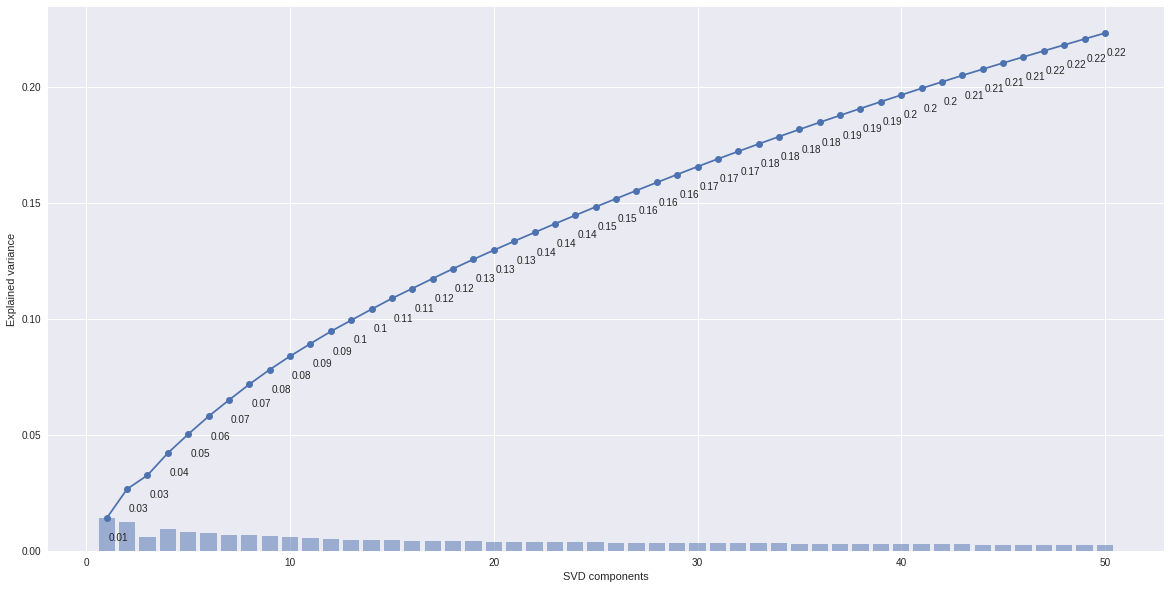

In [64]:
plt.figure(figsize=(20,10))

X = np.arange(1,51)
cumulative_explained_variance_eg_gulf = np.cumsum(SVD.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_eg_gulf, '-o')
plt.bar(X, SVD.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(SVD.explained_variance_ratio_)):
    plt.annotate(str(j.round(2)), xy=(i+.1,j-.01))
    
plt.xlabel('SVD components')
plt.ylabel('Explained variance')

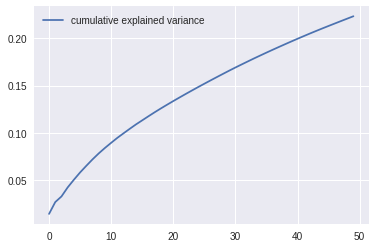

In [58]:
plt.plot(range(50), np.cumsum(SVD.explained_variance_ratio_), label='cumulative explained variance')
plt.legend()

#### Display Top Terms for Each Component 'topics'


In [ ]:
vocabulary_expression = pd.DataFrame(SVD.components_,
                                     index=component_names,
                                     columns=tfidf_vectorizer.get_feature_names()).T


In [ ]:

for i in range(1,11):
    vocabulary_expression['abs_component_{}'.format(i)] = np.abs(vocabulary_expression['component_{}'.format(i)])

In [ ]:
vocabulary_expression['abs_component_1'].sort_values(ascending=False).head(7)


In [ ]:
vocabulary_expression['abs_component_2'].sort_values(ascending=False).head(7)

In [ ]:
vocabulary_expression['abs_component_3'].sort_values(ascending=False).head(7)

In [ ]:
vocabulary_expression['abs_component_4'].sort_values(ascending=False).head(7)

In [ ]:
vocabulary_expression['abs_component_5'].sort_values(ascending=False).head(7)

In [ ]:
vocabulary_expression['abs_component_6'].sort_values(ascending=False).head(7)

In [ ]:
vocabulary_expression['abs_component_7'].sort_values(ascending=False).head(7)

In [ ]:
vocabulary_expression['abs_component_8'].sort_values(ascending=False).head(7)

In [ ]:
vocabulary_expression['abs_component_9'].sort_values(ascending=False).head(7)

In [ ]:
vocabulary_expression['abs_component_10'].sort_values(ascending=False).head(7)

### Search

#### Encode the search term using the same vectorizer


In [ ]:
search_sentences = [
{"sentence": "الثوره المصريه تحولت من ثورة شارع محدش يزعل", "title" : "EG"},
{"sentence": "نفسي اكون زيك بعرف اطنشك أو اخليك اخر حاجة و بعد كده اضحك عليك بكلمتين و انت تصدق كل مرة عادي", "title" : "EG"},
{"sentence": "بما أن أغلب اللي متابعني مش بقدر اوصلهم أغلب الوقت. . ف كل يوم هعمل تويته آخر اليوم اللي هيعمل لايك", "title" : "EG"},
{"sentence": "مقاومتنا للأشياء طلعت بتقل مع الزمن، مبقيناش نناهد ف حاجة.. و مش عشان أحنا جامدين قوي. هو حيلنا بس", "title" : "EG"},
{"sentence": "عارف ايه احلى حاجة حاصلة ليا انى منك وانت برضه بتجرى فيا انت اخر كل يوم باخدك ف حضنى وانت اول", "title" : "EG"},
{"sentence": "القاضى اللى حكم على المعتقلين بالاعدام هو هو نفس القاضى اللى هيراقب الانتخابات", "title" : "EG"},
{"sentence": "وفجأة تيجي سيرة حاجة في وسط الكلام تقلب عليك القديم والجديد وترسم في دماغك علامات استفهام مالهاش", "title" : "EG"},
{"sentence": "السنة اللي فاتت الاعلام الانجليزي قال المفروض بيب يعرف انه في البريمييرليج لازم يتأقلم و يلعب كورتنا", "title" : "EG"},
{"sentence": "حرب و قتال و ناس تموت و هذا الدلخ يقول سعيد و مثل أجواء كرة القدم ", "title" : "GULF"},
{"sentence": "من غباء الهلالي الدلخ اللي يفتخر بفوز فريقه من قيادة رئيس الحكام كلاتنبيرغ له سنه ماسنع الحكام السعوديين", "title" : "GULF"},
{"sentence": "شفتوا هوشة شيعان وغالي لو هي بين الهلاليين كان شفتوا هاشتاق كبر راسهم المنسم وكان جاك هذا الدلخ ", "title" : "GULF"},
{"sentence": "ذويه ارفضوا لانه عيار جمبازي مافيه شي وبليس مايكسر اماعينه يامال لضعفه قطو بو سبعة ارواح ", "title" : "GULF"},
{"sentence": "صج ياجماعه في سوال محيرني ليش المتان مافيهم النفسيه عكس الضعاف تقول خاشوقه ومنفس", "title" : "GULF"},
{"sentence": "لم نعاند التاريخ مسيو خاشوقه بل الواقع والعقلانية ابعدنا من التدمير والانفلات", "title" : "GULF"},
{"sentence": "أي والله وعندي عنه ابو خاشوقة أسرار لا تشرف قد أقولها اذا لم يلجم لسانه عن سب وطني", "title" : "GULF"},
{"sentence": "قبل ماتتكلمين يالطيبه افهمي السالفه ومنب ملزومه بسنابي اني اشرح كل شيء صارت بالتفصيل بس لانك قلق خل", "title" : "GULF"},
]

In [ ]:
search_sentences_df = pd.DataFrame(search_sentences)


In [ ]:
search_sentences_df.sample(4)

In [ ]:
search_sentences_df.sentence


In [ ]:
search_terms_encoded = tfidf_vectorizer.transform(search_sentences_df.sentence)

In [ ]:
search_terms_encoded_df = pd.DataFrame(search_terms_encoded.toarray(), 
                                       index=search_sentences_df.sentence, 
                                       columns=tfidf_vectorizer.get_feature_names())

In [ ]:
search_terms_encoded_df.head()

### Select a Random Search Term

In [ ]:
random_search_term_df = search_terms_encoded_df.sample(3)
random_search_term_df.head()

### Append the search term to the document term matrix


In [ ]:
random_search_term_df

In [ ]:
dtm_with_search_term.head()

In [ ]:
dtm_with_search_term.tail()

In [ ]:
random_search_term_df

In [ ]:
document_term_matrix_df.head()

In [ ]:
dtm_with_search_term = document_term_matrix_df.append(random_search_term_df)

In [ ]:
random_search_term_df

In [ ]:
dtm_with_search_term.head()

In [ ]:
dtm_with_search_term.tail()

In [ ]:
component_names

In [ ]:
svd_matrix[0]

In [ ]:
svd_df = pd.DataFrame(svd_matrix, 
                      index=dtm_with_search_term.index, 
                      columns=component_names)

In [ ]:
dtm_with_search_term[:2]

### Identify the Vector for our Search Term

In [ ]:
search_term_svd_vector = svd_df.loc[random_search_term_df.index]
search_term_svd_vector

### Use Cosine Similarity to Find the Most Similar Vector

In [ ]:
svd_df.head()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
svd_df['cosine_sim'] = cosine_similarity(svd_df, search_term_svd_vector)

In [ ]:
svd_df[['cosine_sim']].sort_values('cosine_sim', ascending=False).head(5)

### Ridge Classifier Pipeline

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['class_numerical'], random_state = 42)

In [66]:
X_train.iloc[0]

'سويسرا تاريخيا هي مغاره علي بابا وملاذ اامن لاموال اللصوص المنهوبة من شعوب العالم ويجب ان ينتهي ذلك فهي مغسلة أموال…'

In [68]:
# !pip install --quiet tqdm


In [69]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm
import numpy as np

In [70]:
params = [(ngr, mindf, maxdf, alpha)
          for ngr in [(1,1), (1,2)]
          for mindf in [1,2,4,8]
          for maxdf in np.linspace(.95,.999,5)
          for alpha in np.logspace(-1,3,5)
         ]

skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results_list = []

for ngr, mindf, maxdf, alpha in tqdm(params):
    results = {
        'ngram_range' : ngr,
        'min_df' : mindf,
        'max_df' : maxdf,
        'alpha' : alpha
    }
    train_scores = list()
    val_scores = list()
    
    for train_indices, val_indices in skfold.split(X_train.astype('str'), y_train):
        
        X_train_kf, y_train_kf = X_train.iloc[train_indices], y_train.iloc[train_indices]
        X_val_kf, y_val_kf = X_train.iloc[val_indices], y_train.iloc[val_indices]
        
        lsa_pipe = Pipeline([
                                ('tfidf', TfidfVectorizer(ngram_range=ngr, min_df=mindf, max_df=maxdf)),
                                ('svd', TruncatedSVD(50)),
                                ('clf', RidgeClassifier(alpha=alpha))
                            ])
        
        lsa_pipe.fit(X_train_kf, y_train_kf)
        
        train_scores.append(lsa_pipe.score(X_train_kf, y_train_kf))
        val_scores.append(lsa_pipe.score(X_val_kf, y_val_kf))
        
    results['mean_train_score'] = np.mean(train_scores)
    results['mean_val_score'] = np.mean(val_scores)
    results_list.append(results)

cv_results = pd.DataFrame(results_list)

cv_results.sort_values('mean_val_score', ascending=False, inplace=True)

alpha, maxdf, _, _, mindf, ngr = cv_results.iloc[0].values

cv_results.head()

100%|██████████| 200/200 [02:34<00:00,  1.30it/s]


,alpha,max_df,mean_train_score,mean_val_score,min_df,ngram_range
136,1.0,0.97450,0.971314,0.974465,2,"(1, 2)"
42,10.0,0.98675,0.973836,0.974465,2,"(1, 1)"
31,1.0,0.96225,0.972577,0.973056,2,"(1, 1)"
137,10.0,0.97450,0.973207,0.973036,2,"(1, 2)"
145,0.1,0.99900,0.967850,0.971707,2,"(1, 2)"


In [71]:
lsa_pipe = Pipeline([
                        ('tfidf', TfidfVectorizer(ngram_range=ngr, min_df=mindf, max_df=maxdf)),
                        ('svd', TruncatedSVD(100)),
                        ('clf', RidgeClassifier(alpha=alpha))
                    ])

lsa_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.97449999999999992, max_features=None,
        min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
  ...True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001))])

In [72]:
lsa_pipe.score(X_train, y_train)


0.97163120567375882

In [73]:
lsa_pipe.score(X_test, y_test)


0.96170212765957441

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
y_pred = lsa_pipe.predict(X_test)


In [76]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       135
          1       0.97      0.94      0.95       100

avg / total       0.96      0.96      0.96       235



In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,  y_train)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))